In [1]:
import mne
import os
from datahandling import BcomMEG
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pywt
from scipy.signal import spectrogram
import nibabel as nib
from mne.surface import _project_onto_surface

In [153]:
os.getcwd()

'/Users/ciprianbangu/Cogmaster/M2 Internship/BCI code'

## Brain Regions 

In [49]:
fs_dir = mne.datasets.fetch_fsaverage(verbose=True)
subjects_dir = os.path.dirname(fs_dir)
labels = mne.read_labels_from_annot(
    subject='fsaverage', 
    parc='HCPMMP1',  # Use the aparc.a2009s parcellation
    hemi='lh',
    subjects_dir=subjects_dir
)

0 files missing from root.txt in /Users/ciprianbangu/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage
Reading labels from parcellation...
   read 181 labels from /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage/label/lh.HCPMMP1.annot


In [50]:
#SMA from Sheets et al. 2021 - not sure about the Pre-SMA
ba6_labels = [label for label in labels if 'L_6ma_ROI-lh' in label.name][0] +\
            [label for label in labels if 'L_6mp_ROI-lh' in label.name][0] +\
            [label for label in labels if 'L_SCEF_ROI-lh' in label.name][0] +\
            [label for label in labels if 'L_SFL_ROI-lh' in label.name][0]
ba6_labels
brain = stc[0].plot(subject='fsaverage', subjects_dir=subjects_dir, initial_time=-0.3, hemi='both', time_viewer=True)
brain.add_label(label=ba6_labels, borders=True, color='red')

Using control points [1.00975557e-10 1.13399937e-10 2.39145092e-10]


qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x380c12860> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x37a5fe6f0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x379f2f9b0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x3510d2150> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x379fd1f80> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x379fd31b0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x379fd3b00> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1

In [13]:
# Broca's area
broca_labels = [label for label in labels if "L_44_ROI-lh" in label.name][0] +\
        [label for label in labels if "L_45_ROI-lh" in label.name][0] #+\
        # [label for label in labels if "L_IFSp_ROI-lh" in label.name][0]

brain = stc[0].plot(subject='fsaverage', subjects_dir=subjects_dir, initial_time=-0.3, hemi='both', time_viewer=True)
brain.add_label(label=broca_labels, borders=True, color='red')

Using control points [1.00975557e-10 1.13399937e-10 2.39145092e-10]


qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x31a12ac20> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x3838b2020> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x30cf62bc0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x3838db380> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x38537f5e0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x385383190> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x385383ae0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1

In [ ]:
# Superior temporal gyrus (directly from aparc)
labels = mne.read_labels_from_annot(
    subject='fsaverage', 
    parc='aparc',  # Use the aparc.a2009s parcellation
    hemi='lh',
    subjects_dir=subjects_dir
)
stg_labels = [label for label in labels if "superiortemporal-lh" in label.name][0]

brain = stc[0].plot(subject='fsaverage', subjects_dir=subjects_dir, initial_time=-0.3, hemi='both', time_viewer=True)
brain.add_label(label=stg_labels, borders=True, color='red')

Reading labels from parcellation...
   read 35 labels from /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage/label/lh.aparc.annot
Using control points [1.00975557e-10 1.13399937e-10 2.39145092e-10]


qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x35be4ebc0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x1583a9460> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x38854f450> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x3885508c0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x3885556a0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x388556950> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x3885572e0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1

In [ ]:
# Middle temporal gyrus
labels = mne.read_labels_from_annot(
    subject='fsaverage', 
    parc='aparc',  # Use the aparc.a2009s parcellation
    hemi='lh',
    subjects_dir=subjects_dir
)
labels
mtg_labels = [label for label in labels if 'middletemporal-lh' in label.name][0]

brain = stc[0].plot(subject='fsaverage', subjects_dir=subjects_dir, initial_time=-0.3, hemi='both', time_viewer=True)
brain.add_label(label=mtg_labels, borders=True, color='red')

Reading labels from parcellation...
   read 35 labels from /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage/label/lh.aparc.annot


[<Label | fsaverage, 'bankssts-lh', lh : 2137 vertices>,
 <Label | fsaverage, 'caudalanteriorcingulate-lh', lh : 1439 vertices>,
 <Label | fsaverage, 'caudalmiddlefrontal-lh', lh : 3736 vertices>,
 <Label | fsaverage, 'cuneus-lh', lh : 1630 vertices>,
 <Label | fsaverage, 'entorhinal-lh', lh : 1102 vertices>,
 <Label | fsaverage, 'frontalpole-lh', lh : 272 vertices>,
 <Label | fsaverage, 'fusiform-lh', lh : 4714 vertices>,
 <Label | fsaverage, 'inferiorparietal-lh', lh : 7871 vertices>,
 <Label | fsaverage, 'inferiortemporal-lh', lh : 4415 vertices>,
 <Label | fsaverage, 'insula-lh', lh : 5229 vertices>,
 <Label | fsaverage, 'isthmuscingulate-lh', lh : 2531 vertices>,
 <Label | fsaverage, 'lateraloccipital-lh', lh : 6379 vertices>,
 <Label | fsaverage, 'lateralorbitofrontal-lh', lh : 4188 vertices>,
 <Label | fsaverage, 'lingual-lh', lh : 4205 vertices>,
 <Label | fsaverage, 'medialorbitofrontal-lh', lh : 2653 vertices>,
 <Label | fsaverage, 'middletemporal-lh', lh : 4452 vertices>,
 <

In [ ]:
import os
import numpy as np
import mne
import nibabel.freesurfer
from mne.transforms import apply_trans
from mne import read_talxfm

# --- Step 0: Set up paths and parameters ---
subject = 'fsaverage'
hemi = 'lh'
parc = 'HCPMMP1'  # or 'aparc.a2009s', etc.

# --- Step 1: Load parcellation labels ---
labels = mne.read_labels_from_annot(
    subject=subject,
    parc=parc,
    hemi=hemi,
    subjects_dir=subjects_dir
)

# --- Step 2: Load the pial surface and wrap it into a dict ---
surf_path = os.path.join(subjects_dir, subject, 'surf', f'{hemi}.pial')
coords_surf, faces = nibabel.freesurfer.read_geometry(surf_path)
# coords_surf is an array of shape (n_vertices, 3)

# --- Step 3: Load the Talairach transform and invert it ---
xfm = read_talxfm(subject, subjects_dir=subjects_dir)
# xfm['trans'] maps from FreeSurfer RAS -> Talairach.
# Invert it to convert Talairach/MNI305 → FreeSurfer RAS.
T_inv = np.linalg.inv(xfm['trans'])

# --- Step 4: Define your coordinates in Talairach/MNI305 space ---
coords_tal = np.array([ 
    [-47, -35, 18],
    [-52, -40, 22],
    [-52, -43, 28],
    [-53, -50, 15],
    [-49, -44, 23],
    [-53, -39, 22],
    [-51, -37, 18],
    [-55, -47, 22],
    [-49, -35, 18],
    [-40, -41, 14],
    [-61, -33, 11],
    [-42, -32, 16],
    [-40, -32, 26],
    [-59, -47, 17]
])
# --- Step 5: Convert Talairach coordinates to FreeSurfer RAS ---
coords_ras = apply_trans(T_inv, coords_tal)
print("Transformed coordinates (RAS):")
print(coords_ras)

results = []

# --- Step 6: Nearest-vertex search and label lookup ---
for i, ras_coord in enumerate(coords_ras):
    # Compute Euclidean distances to all surface vertices
    dists = np.linalg.norm(coords_surf - ras_coord, axis=1)
    vert_idx = np.argmin(dists)  # index of the closest vertex

    # Look up which label contains this vertex:
    label_name = None
    for label in labels:
        if vert_idx in label.vertices:
            label_name = label.name
            results.append((ras_coord, label_name))
            break
    if label_name is None:
        print(f"S{i+1} ({coords_tal[i]}): label not found")
    else:
        print(f"S{i+1} ({coords_tal[i]}): {label_name}")


spt = [result[1] for result in results]
spt_labels = []

for roi in spt:
    spt_labels.extend([label for label in labels if roi in label.name])

spt_roi = spt_labels[0]
for label in spt_labels[1:]:
    spt_roi+=label


brain = stc[0].plot(subject='fsaverage', subjects_dir=subjects_dir, initial_time=-0.3, hemi='both', time_viewer=True)
brain.add_label(label=spt_roi, borders=True, color='red')

Reading labels from parcellation...
   read 181 labels from /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage/label/lh.HCPMMP1.annot
Transformed coordinates (RAS):
[[-47. -35.  18.]
 [-52. -40.  22.]
 [-52. -43.  28.]
 [-53. -50.  15.]
 [-49. -44.  23.]
 [-53. -39.  22.]
 [-51. -37.  18.]
 [-55. -47.  22.]
 [-49. -35.  18.]
 [-40. -41.  14.]
 [-61. -33.  11.]
 [-42. -32.  16.]
 [-40. -32.  26.]
 [-59. -47.  17.]]
S1 ([-47 -35  18]): L_PFcm_ROI-lh
S2 ([-52 -40  22]): L_PSL_ROI-lh
S3 ([-52 -43  28]): L_PF_ROI-lh
S4 ([-53 -50  15]): L_STV_ROI-lh
S5 ([-49 -44  23]): L_PFcm_ROI-lh
S6 ([-53 -39  22]): L_PF_ROI-lh
S7 ([-51 -37  18]): L_PSL_ROI-lh
S8 ([-55 -47  22]): L_PSL_ROI-lh
S9 ([-49 -35  18]): L_PFcm_ROI-lh
S10 ([-40 -41  14]): L_RI_ROI-lh
S11 ([-61 -33  11]): L_A4_ROI-lh
S12 ([-42 -32  16]): L_RI_ROI-lh
S13 ([-40 -32  26]): L_RI_ROI-lh
S14 ([-59 -47  17]): L_PSL_ROI-lh
Using control points [1.00975557e-10 1.13399937e-10 2.39145092e-10]


qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x325175420> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x327de9b00> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x39f0c0d20> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x39f0c4900> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x39f0c63f0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x39f0c7620> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x39f0c7f70> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1

0 files missing from root.txt in /Users/ciprianbangu/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage
Extracting time courses for 1 labels (mode: mean_flip)


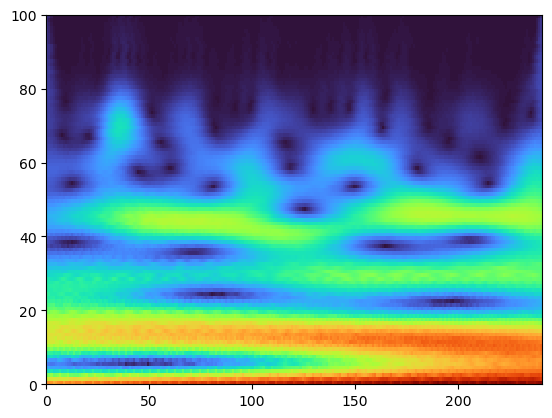

In [63]:
import numpy as np
import mne
from mne.datasets import fetch_fsaverage

# Set up paths
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = fs_dir  # Or path to your subjects directory

# 1. Convert Talairach/MNI coordinates to fsaverage space if needed
# Example coordinates (replace with your actual coordinates from studies)
mni_coords = np.array([ #first 14 from Hickock et al 2009; last 6 from Pa and Hickock 2007
    [-47, -35, 18],
    [-52, -40, 22],
    [-52, -43, 28],
    [-53, -50, 15],
    [-49, -44, 23],
    [-53, -39, 22],
    [-51, -37, 18],
    [-55, -47, 22],
    [-49, -35, 18],
    [-40, -41, 14],
    [-61, -33, 11],
    [-42, -32, 16],
    [-40, -32, 26],
    [-59, -47, 17],
    [-56, -37, 15],
    [-57, -25, 6],
    [-53, -30, 9],
    [-51, -39, 11],
    [-60, -36, 6],
    [-41, -31, 22],
    [-53, -15, 6],
])

# 2. Project volume coordinates to surface
# Load fsaverage surface
surf = mne.read_surface(f'{subjects_dir}/surf/lh.white')
vertices, faces = surf

# Create a probability map on the surface

# Create an empty probability map
n_vertices = len(vertices)
probability = np.zeros(n_vertices)

# For each vertex, calculate its probability based on distance to study coordinates
sigma = 10.0  # Controls the spread of probability (in mm)
for coord in mni_coords:
    # Calculate distances to all vertices
    dists = np.sqrt(np.sum((vertices - coord) ** 2, axis=1))
    # Apply Gaussian kernel to get probability
    probability += np.exp(-(dists ** 2) / (2 * sigma ** 2))

# Normalize
probability /= np.max(probability)

# Create ROI from vertices above threshold
threshold = 0.7  # Adjust based on desired ROI size
roi_vertices = np.where(probability > threshold)[0]
roi = mne.Label(roi_vertices, hemi='lh', name='SPT_ROI',
                subject='fsaverage', pos=vertices[roi_vertices])

subjects_dir = os.path.dirname(fs_dir)
# Create a Brain object for the fsaverage subject
brain = mne.viz.Brain('fsaverage', hemi='lh', subjects_dir=subjects_dir, surf='inflated')

# Add your ROI label to the brain (with borders and in red)
brain.add_label(roi, borders=True, color='red')

# Optionally, adjust the view (e.g., lateral view)
brain.show_view('lateral')

label_time_courses = mne.extract_label_time_course(
    stc,
    roi,
    src=source,
    mode='mean_flip',
    return_generator=False,
)

# plt.plot(np.array(label_time_courses[0][0]))
result = process_channel(
                    signal=np.array(label_time_courses[0][0]),
                    cwt_wavelet=cwt_wavelet, 
                    scales=scales, 
                    sampling_period=sampling_period,
                    dwt_wavelet_name=dwt_wavelet_name, 
                    level=level
                    )

plt.pcolormesh(result, cmap='turbo')

In [ ]:
# STP This should be SPT. 
spt_labels = [label for label in labels if "L_A1_ROI-lh" in label.name][0] +\
            [label for label in labels if "L_MBelt_ROI-lh" in label.name][0] +\
            [label for label in labels if "L_LBelt_ROI-lh" in label.name][0] +\
            [label for label in labels if "L_TA2_ROI-lh" in label.name][0] +\
            [label for label in labels if "L_RI_ROI-lh" in label.name][0] +\
            [label for label in labels if "L_PBelt_ROI-lh" in label.name][0] 

brain = stc[0].plot(subject='fsaverage', subjects_dir=subjects_dir, initial_time=-0.3, hemi='both', time_viewer=True)
brain.add_label(label=stp_labels, borders=True, color='red')

IndexError: list index out of range

In [ ]:
# frontal areas/BA10
ba10_labels = [label for label in labels if "L_10d_ROI-lh" in label.name][0] +\
            [label for label in labels if "L_10v_ROI-lh" in label.name][0] +\
            [label for label in labels if "L_a10p_ROI-lh" in label.name][0] +\
            [label for label in labels if "L_p10p_ROI-lh" in label.name][0] 

brain = stc[0].plot(subject='fsaverage', subjects_dir=subjects_dir, initial_time=-0.3, hemi='both', time_viewer=True)
brain.add_label(label=ba10_labels, borders=True, color='red')

Using control points [1.00975557e-10 1.13399937e-10 2.39145092e-10]


qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x6acf0f4f0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x6234a9e70> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x7003c9130> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x7003ca4c0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x7003cf050> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x7003d0310> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x7003d0ca0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1

## Overt

In [2]:
dir = '/Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/OVERT'
epo_files = []
subjects = ['BCOM_18_3']
avoid_reading = True
data = BcomMEG(dir=dir, subjects=subjects, avoid_reading=avoid_reading)
data.data

Reading /Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/OVERT/BCOM_18_3_i_116-epo.fif ...
    Found the data of interest:
        t =    -300.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Reading /Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/OVERT/BCOM_18_3_e_114-epo.fif ...
    Found the data of interest:
        t =    -300.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


{'BCOM_18_3': {'i_116': <EpochsFIF | 1 events (all good), -0.3 – 0.5 s (baseline off), ~837 kB, data loaded,
   '116': 1>,
  'e_114': <EpochsFIF | 1 events (all good), -0.3 – 0.5 s (baseline off), ~837 kB, data loaded,
   '114': 1>}}

In [60]:
for syllable in data.data['BCOM_18_3']:
    print(len(data.data['BCOM_18_3'][syllable]))
    break

1


(1, 241)
(100, 1, 1, 242)
(100, 241)


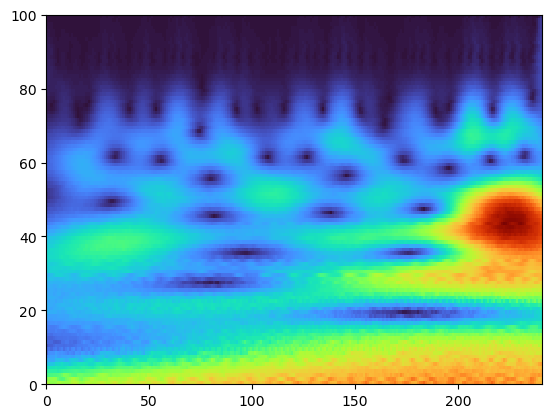

In [46]:
# # get the source space using fsaverage (no coregistration available)
# source = mne.setup_source_space(subject='fsaverage', spacing='oct6', add_dist=False)
# # boundary element model
# bem_model = mne.make_bem_model(
#     subject='fsaverage',
#     ico=4,
#     conductivity=(0.3, ),
#     subjects_dir=subjects_dir
#     )
# bem = mne.make_bem_solution(bem_model)

# sample_epo = data.data['BCOM_18_3']['e_114']

# # compute the forward solution
# fwd = mne.make_forward_solution(
#     sample_epo.info,
#     trans='fsaverage', 
#     src=source, 
#     bem=bem, 
#     meg=True, 
#     eeg=False
#     )

# # compute noise covariance matrix from baseline (i guess just the start of the epoch)
# cov = mne.compute_covariance(sample_epo, tmin=-0.3, tmax=-0.2, method='empirical') # ok actually this step might be broken in this data structure
# # idk how we would get the normalization. 

# #create inverse operator
# inverse_operator = mne.minimum_norm.make_inverse_operator(
#     sample_epo.info, 
#     fwd, 
#     cov, 
#     loose=0.2, 
#     depth=0.8,
# )

# # applt inverse operator for all of the epochs
# snr = 3.0
# lambda2 = 1.0/snr**2 # regularization parameter

# stc = mne.minimum_norm.apply_inverse_epochs(
#     sample_epo,
#     inverse_operator=inverse_operator,
#     lambda2=lambda2,
#     method='eLORETA'
# )
    

# label_time_courses = mne.extract_label_time_course(
#     stc,
#     ba6_labels,
#     src=source,
#     mode='mean_flip',
#     return_generator=False,
# )

print(label_time_courses[0].shape)

result = process_channel(
                    signal=label_time_courses,
                    cwt_wavelet=cwt_wavelet, 
                    scales=scales, 
                    sampling_period=sampling_period,
                    dwt_wavelet_name=dwt_wavelet_name, 
                    level=level
                    )

print(result.shape)

for i in range(14):
    epo_a_tc = label_time_courses[i]
    result = process_channel(
                    signal=epo_a_tc,
                    cwt_wavelet=cwt_wavelet, 
                    scales=scales, 
                    sampling_period=sampling_period,
                    dwt_wavelet_name=dwt_wavelet_name, 
                    level=level
                    )
    result_swapped = np.transpose(result, (0,2,1))
    result_swapped = result_swapped.squeeze()[:, 1:]
    print(result_swapped.shape)
    plt.pcolormesh(result_swapped, cmap='turbo')
    plt.show()
    break

Considering frequencies 4 ... 100 Hz
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 31 (216 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 247 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Reducing data rank 247 -> 31
Using 2 tapers with bandwidth 4.0 Hz on 1 epochs


  0%|          |  : 0/1 [00:00<?,       ?it/s]

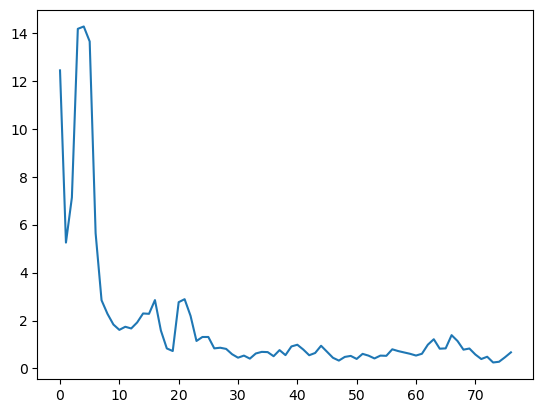

In [221]:
fmin, fmax = 4, 100
stc = mne.minimum_norm.compute_source_psd_epochs(
    a_112_epochs,
    inverse_operator,
    lambda2=1.0/9.0,
    method="dSPM",
    fmin=fmin,
    fmax=fmax,
    pick_ori='normal',
    label=label,
)

plt.plot(stc[0].data.T.mean(axis=1))

## Covert

In [25]:
with open("/Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/all_covert_producing.pkl", 'rb') as f:
    data_covert_producing = pickle.load(f)

In [223]:
# get the source space using fsaverage (no coregistration available)
source = mne.setup_source_space(subject='fsaverage', spacing='oct6', add_dist=False)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/ciprianbangu/mne_data/MNE-fsaverage-data
Subject      = fsaverage
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage/surf/lh.white...
Mapping lh fsaverage -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/163842 selected to source space (oct = 6)

Loading /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage/surf/rh.white...
Mapping rh fsaverage -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 409

In [224]:
# boundary element model
fs_dir = mne.datasets.fetch_fsaverage(verbose=True)
subjects_dir = os.path.dirname(fs_dir)
bem_model = mne.make_bem_model(
    subject='fsaverage',
    ico=4,
    conductivity=(0.3, ),
    subjects_dir=subjects_dir
    )
bem = mne.make_bem_solution(bem_model)

0 files missing from root.txt in /Users/ciprianbangu/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage
Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
inner skull CM is  -0.53 -21.10   6.21 mm
Surfaces passed the basic topology checks.
Complete.

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.


In [225]:
# take an example set of epoch
a_112_epochs = data_covert_producing.data['BCOM_01_3']['a_112']

In [226]:
# compute the forward solution
fwd = mne.make_forward_solution(
    a_112_epochs.info,
    trans='fsaverage', 
    src=source, 
    bem=bem, 
    meg=True, 
    eeg=False
    )

Source space          : <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=4098>, <surface (rh), n_vertices=163842, n_used=4098>] MRI (surface RAS) coords, subject 'fsaverage', ~25.3 MB>
MRI -> head transform : /opt/homebrew/Caskroom/miniconda/base/envs/mne/lib/python3.12/site-packages/mne/data/fsaverage/fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
    0.999994 0.003552 0.000202      -1.76 mm
    -0.003558 0.998389 0.056626      31.09 mm
    -0.000001 -0.056626 0.998395      39.60 mm
    0.000000 0.000000 0.000000       1.00

Read 247 MEG channels from info
105 coil definitions read
Coordinate transformation: MEG device -> head
    0.999948 0.010196 0.000254       1.29 mm
    -0.009754 0.948784 0.315774     -30.89 mm

In [227]:
# compute noise covariance matrix from baseline (i guess just the start of the epoch)
cov = mne.compute_covariance(a_112_epochs, tmin=-0.3, tmax=-0.2, method='empirical') # ok actually this step might be broken in this data structure
# idk how we would get the normalization. 

#create inverse operator
inverse_operator = mne.minimum_norm.make_inverse_operator(
    a_112_epochs.info, 
    fwd, 
    cov, 
    loose=0.2, 
    depth=0.8,
)

Reducing data rank from 247 -> 247
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 403
[done]
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 247 channels.
    247 out of 247 channels remain after picking
Selected 247 channels
Creating the depth weighting matrix...
    247 magnetometer or axial gradiometer channels


/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_6492/928525346.py:2: RuntimeWarning: Too few samples (required : 1240 got : 403), covariance estimate may be unreliable
  cov = mne.compute_covariance(a_112_epochs, tmin=-0.3, tmax=-0.2, method='empirical') # ok actually this step might be broken in this data structure


    limit = 8091/8196 = 10.029609
    scale = 6.80715e-11 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
Computing rank from covariance with rank=None
    Using tolerance 4.5e-13 (2.2e-16 eps * 247 dim * 8.2  max singular value)
    Estimated rank (mag): 247
    MAG: rank 247 computed from 247 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.
    largest singular value = 4.93588
    scaling factor to adjust the trace = 2.70578e+19 (nchan = 247 nzero = 0)


In [228]:
# applt inverse operator for all of the epochs
snr = 2.0
lambda2 = 1.0/snr**2 # regularization parameter

In [229]:
stc = mne.minimum_norm.apply_inverse_epochs(
    a_112_epochs,
    inverse_operator=inverse_operator,
    lambda2=lambda2,
    method='eLORETA'
)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 247 (0 small eigenvalues omitted)
    Computing optimized source covariance (eLORETA)...
        Using independent orientation weights
        Fitting up to 20 iterations (this make take a while)...
        Converged on iteration 10 (7.4e-07 < 1e-06)
        Updating inverse with weighted eigen leads
[done]
Picked 247 channels from the data
Computing inverse...
    Eigenleads already weighted ... 
Processing epoch : 1 / 13
combining the current components...
Processing epoch : 2 / 13
combining the current components...
Processing epoch : 3 / 13
combining the current components...
Processing epoch : 4 / 13
combining the current components...
Processing epoch : 5 / 13
combining the current components...
Processing epoch : 

In [116]:
mne.datasets.fetch_hcp_mmp_parcellation(subjects_dir=subjects_dir, verbose=True)
mne.datasets.fetch_aparc_sub_parcellation()

In [42]:
# read labels from fsaverage annotation using aparc parcellation
labels = mne.read_labels_from_annot(
    subject='fsaverage', 
    parc='HCPMMP1',  # Human Connectome Project's Multi-Modal Parcellation
    hemi='both',
    subjects_dir=subjects_dir)
labels

Reading labels from parcellation...
   read 181 labels from /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage/label/lh.HCPMMP1.annot
   read 181 labels from /Users/ciprianbangu/mne_data/MNE-fsaverage-data/fsaverage/label/rh.HCPMMP1.annot


[<Label | fsaverage, '???-lh', lh : 13868 vertices>,
 <Label | fsaverage, '???-rh', rh : 13940 vertices>,
 <Label | fsaverage, 'L_10d_ROI-lh', lh : 867 vertices>,
 <Label | fsaverage, 'L_10pp_ROI-lh', lh : 401 vertices>,
 <Label | fsaverage, 'L_10r_ROI-lh', lh : 445 vertices>,
 <Label | fsaverage, 'L_10v_ROI-lh', lh : 694 vertices>,
 <Label | fsaverage, 'L_11l_ROI-lh', lh : 713 vertices>,
 <Label | fsaverage, 'L_13l_ROI-lh', lh : 791 vertices>,
 <Label | fsaverage, 'L_1_ROI-lh', lh : 2162 vertices>,
 <Label | fsaverage, 'L_23c_ROI-lh', lh : 1253 vertices>,
 <Label | fsaverage, 'L_23d_ROI-lh', lh : 511 vertices>,
 <Label | fsaverage, 'L_24dd_ROI-lh', lh : 1115 vertices>,
 <Label | fsaverage, 'L_24dv_ROI-lh', lh : 677 vertices>,
 <Label | fsaverage, 'L_25_ROI-lh', lh : 369 vertices>,
 <Label | fsaverage, 'L_2_ROI-lh', lh : 2554 vertices>,
 <Label | fsaverage, 'L_31a_ROI-lh', lh : 346 vertices>,
 <Label | fsaverage, 'L_31pd_ROI-lh', lh : 545 vertices>,
 <Label | fsaverage, 'L_31pv_ROI-lh'

In [ ]:
# SMA
label_SMA = [l for l in labels if l.name == 'L_6ma_ROI-lh'][0] + \
    [l for l in labels if l.name == 'L_6mp_ROI-lh'][0] + \
    [l for l in labels if l.name == 'L_6d_ROI-lh'][0] + \
    [l for l in labels if l.name == 'L_6a_ROI-lh'][0] + \
    [l for l in labels if l.name == 'L_6r_ROI-lh'][0] + \
    [l for l in labels if l.name == 'L_6r_ROI-lh'][0] + \
    [l for l in labels if l.name == 'L_6v_ROI-lh'][0]

In [230]:
# extract time course from this label for all epochs
label_time_courses = mne.extract_label_time_course(
    stc,
    label,
    src=source,
    mode='mean_flip',
    return_generator=False,
)

Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)


In [231]:
epo_1_tc = label_time_courses[3]

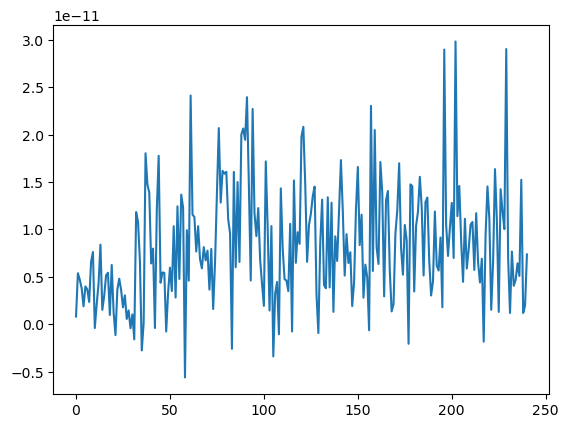

In [232]:
plt.plot(epo_1_tc.T)

In [47]:
def scalogram_de_reconstruction(data, wavelet='db4', level=5):
    # First decompose
    coefficients = pywt.wavedec(data, wavelet, level=level)
    coefficients[-1] = np.zeros_like(coefficients[-1]) #d1 #get rid of these two as in Dash et al 2020.
    coefficients[-2] = np.zeros_like(coefficients[-2]) #d2
    # Reconstruct
    reconstructed_signal = pywt.waverec(coefficients, wavelet)[:len(data)]
    return reconstructed_signal

def scalogram_cwt(processed_data, wavelet, scales, sampling_period):
    coefficients, _ = pywt.cwt(data=processed_data, scales=scales, wavelet=wavelet, sampling_period=sampling_period)
    return coefficients

def process_channel(signal, cwt_wavelet, scales, sampling_period, dwt_wavelet_name, level):
    """Function to parallelize the channel computation"""
    processed = scalogram_de_reconstruction(signal, wavelet=dwt_wavelet_name, level=level)
    coefficients = scalogram_cwt(processed_data=processed, wavelet=cwt_wavelet, scales=scales, sampling_period=sampling_period)
    return np.abs(coefficients)

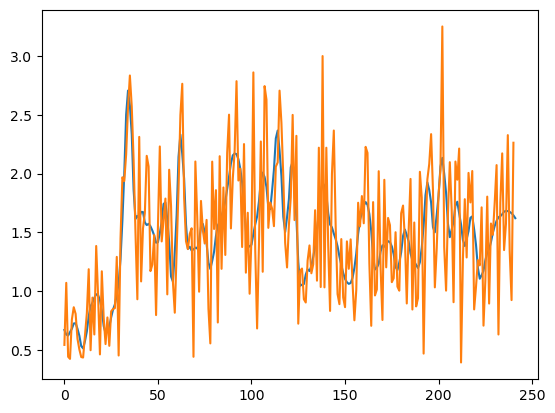

In [136]:
x = scalogram_de_reconstruction(epo_1_tc, level=5)
plt.plot(x.T)
plt.plot(epo_1_tc.T)

In [10]:
dwt_wavelet_name='db4' # denoizing wavelet 
level=5 # level of decomposition. NB in Dash et al. they use 7, but our signal is shorter, so 5 is max
    
    
# CWT Reconstruction variables - better to compute as much outside the loop b/c lots of repetitions
sampling_rate = 300 # data already downsampled to 300 at this point
log_samples = 100 # we want 100 coefficients
cwt_wavelet_name = 'cmor' # reconstruction wavelet
B = 1.0 # wavelet bandwith (higher means more frequencies at each scale, but less precision in peak timing)
C = 1.0 # central frequency (higher means more oscialltions per time window, meaning higher frequency features per scale)
cwt_wavelet = f'{cwt_wavelet_name}{B}-{C}'
frequencies = np.logspace(np.log10(1), np.log10(sampling_rate/2), log_samples)
sampling_period = 1/sampling_rate
scales = pywt.central_frequency(wavelet=cwt_wavelet)/ (frequencies * sampling_period)

In [138]:
result = process_channel(
                    signal=epo_1_tc,
                    cwt_wavelet=cwt_wavelet, 
                    scales=scales, 
                    sampling_period=sampling_period,
                    dwt_wavelet_name=dwt_wavelet_name, 
                    level=level
                    )

In [139]:
result_swapped = np.transpose(result, (0, 2, 1))

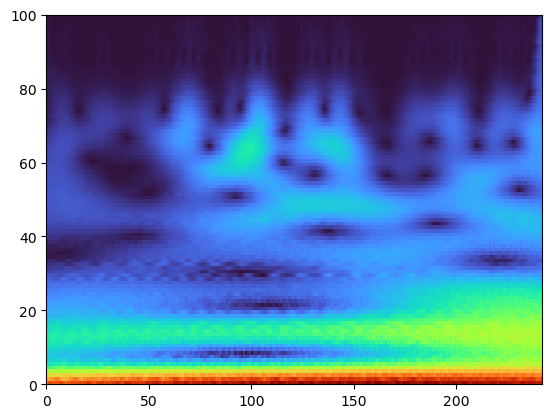

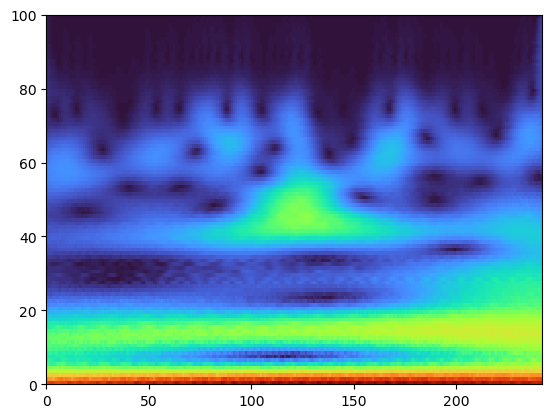

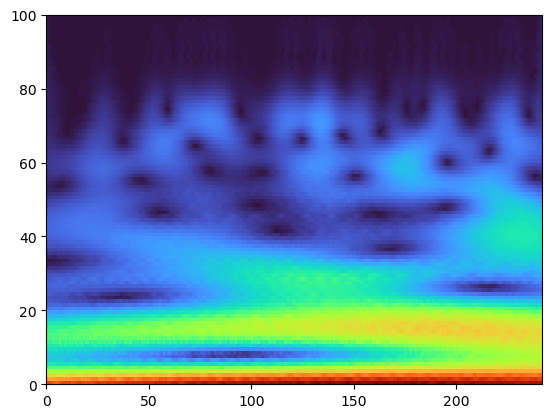

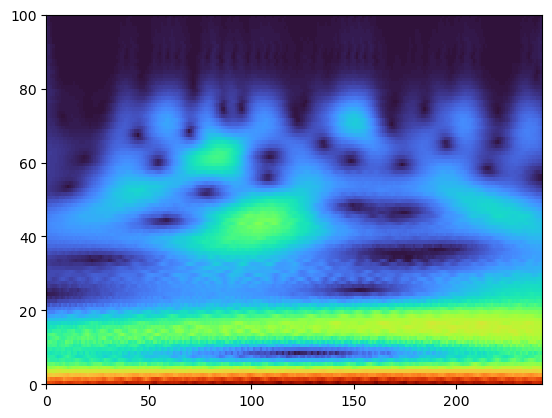

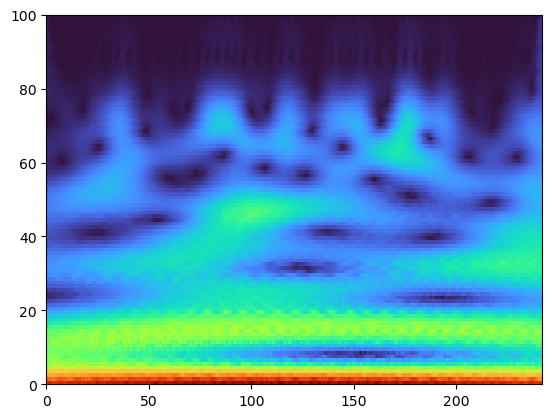

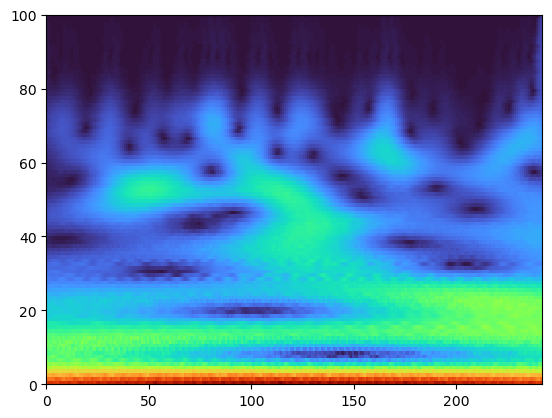

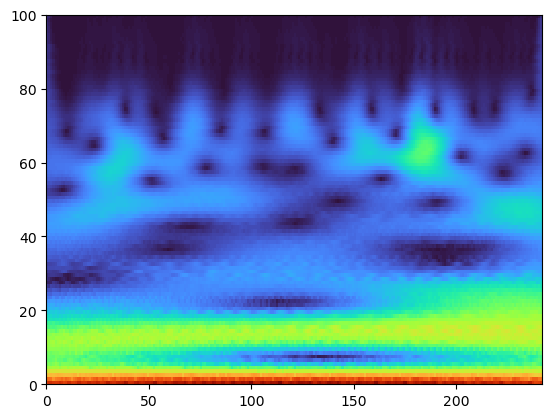

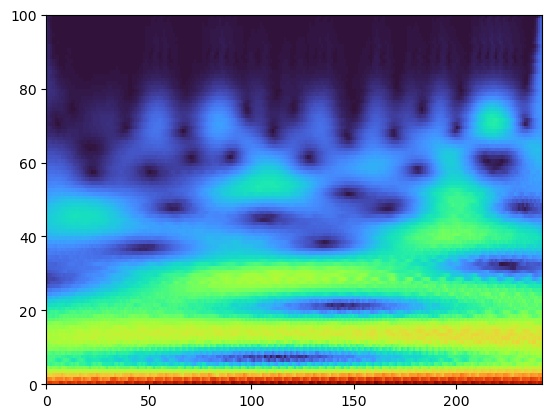

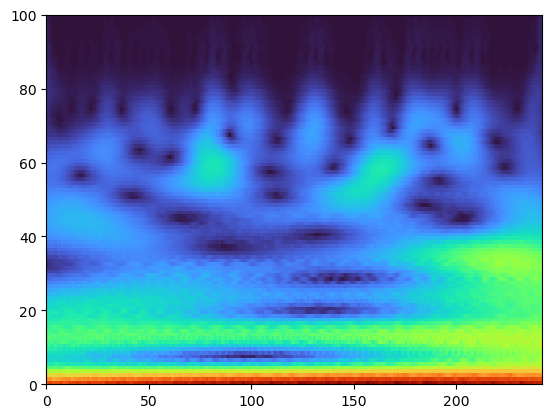

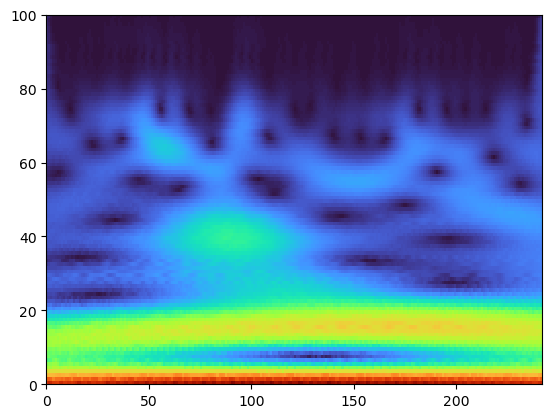

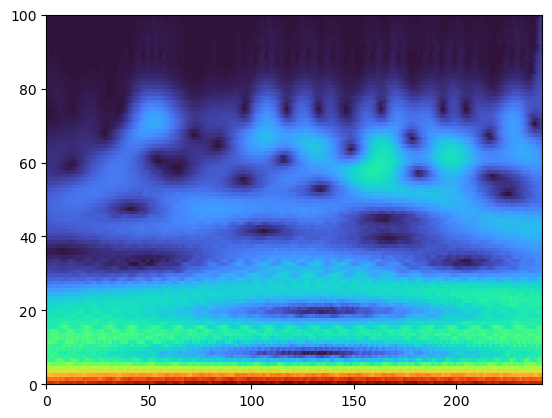

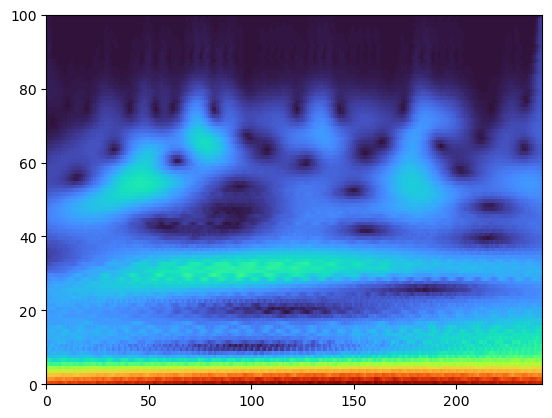

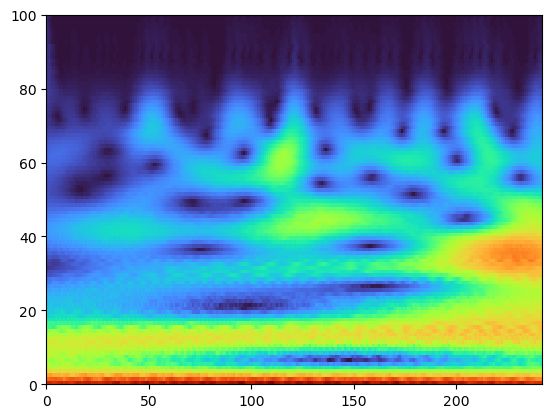

IndexError: list index out of range

In [233]:
for i in range(14):
    epo_a_tc = label_time_courses[i]
    result = process_channel(
                    signal=epo_a_tc,
                    cwt_wavelet=cwt_wavelet, 
                    scales=scales, 
                    sampling_period=sampling_period,
                    dwt_wavelet_name=dwt_wavelet_name, 
                    level=level
                    )
    result_swapped = np.transpose(result, (0,2,1))
    plt.pcolormesh(result_swapped.squeeze(), cmap='turbo')
    plt.show()

In [236]:
e_114_epochs = data_covert_producing.data['BCOM_01_2']['e_114']
stcs_e = mne.minimum_norm.apply_inverse_epochs(epochs=e_114_epochs, inverse_operator=inverse_operator, lambda2=lambda2, method='dSPM')
e_label_tc = mne.extract_label_time_course(stcs_e, label, source, mode='mean_flip', return_generator=False)


Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 247 (0 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 247 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Processing epoch : 1 / 11
combining the current components...
Processing epoch : 2 / 11
combining the current components...
Processing epoch : 3 / 11
combining the current components...
Processing epoch : 4 / 11
combining the current components...
Processing epoch : 5 / 11
combining the current components...
Processing epoch : 6 / 11
combining the current components...
Processing epoch : 7 / 11
combining the current components...
Processing epoch : 8 / 11
combining the current components...
Processing epoch : 9 / 11
combining the current

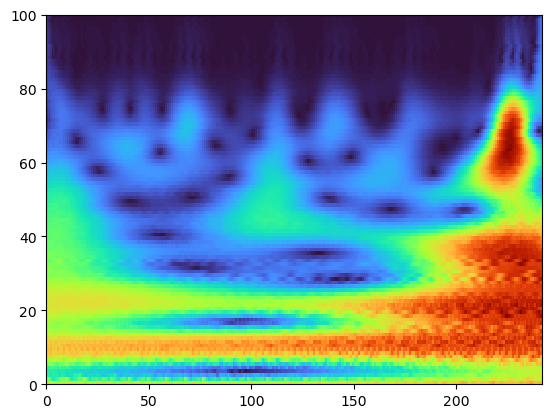

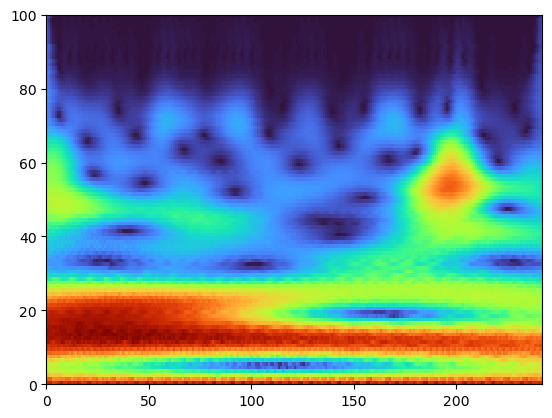

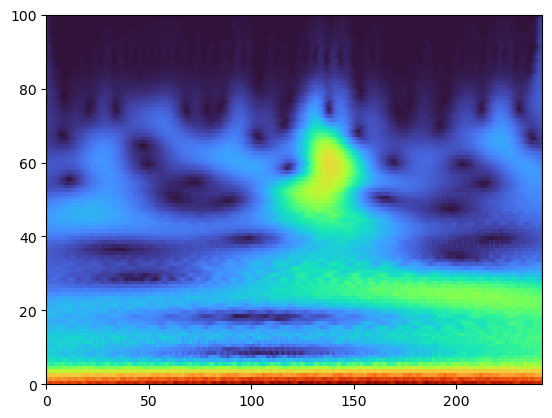

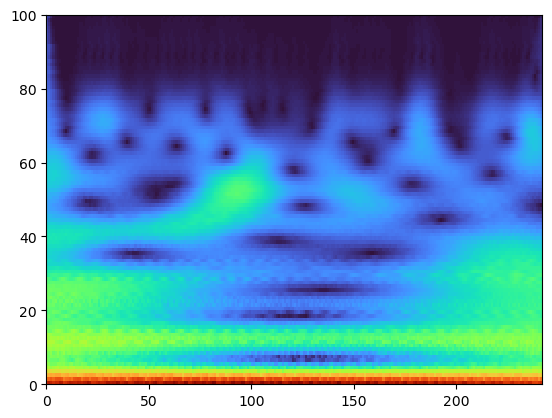

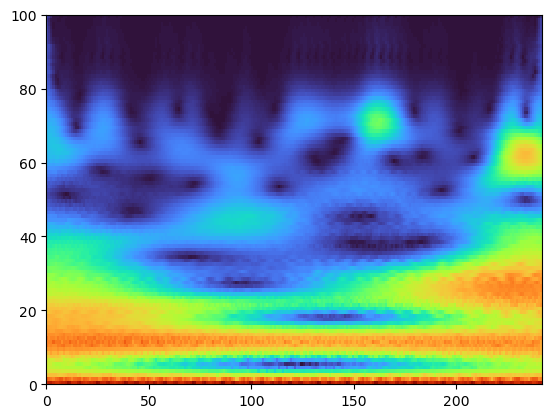

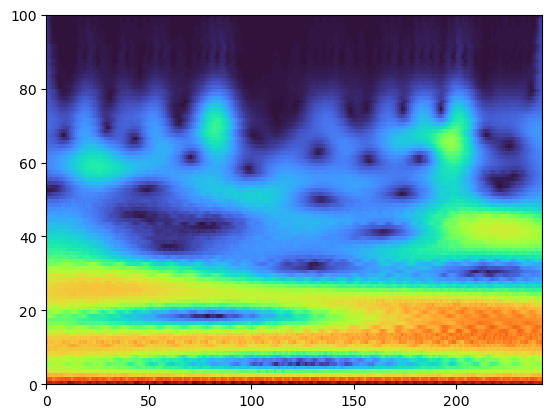

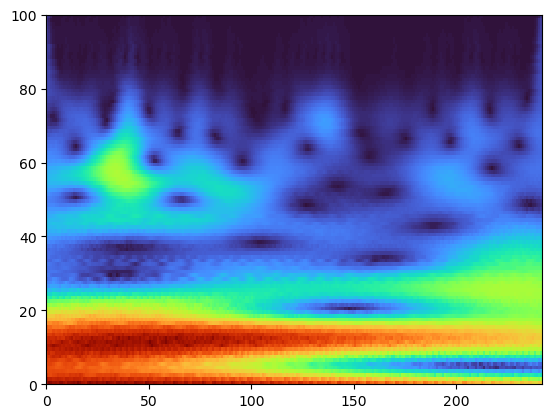

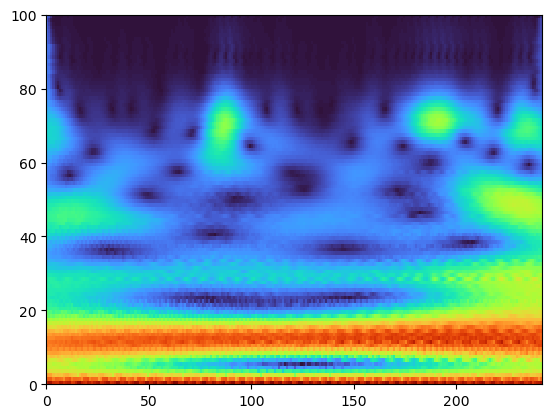

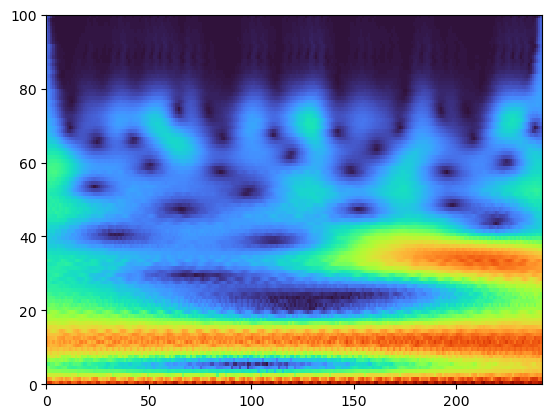

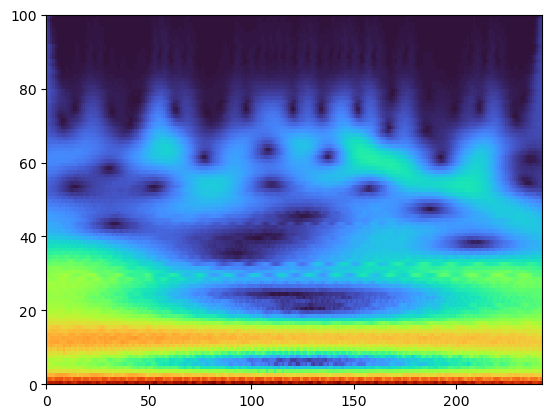

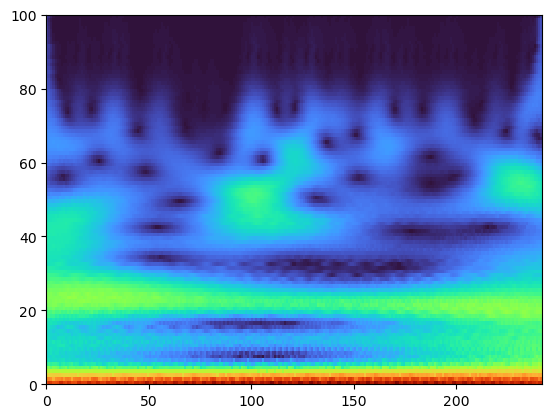

IndexError: list index out of range

In [237]:
for i in range(14):
    epo_e_tc = e_label_tc[i]
    result = process_channel(
                    signal=epo_e_tc,
                    cwt_wavelet=cwt_wavelet, 
                    scales=scales, 
                    sampling_period=sampling_period,
                    dwt_wavelet_name=dwt_wavelet_name, 
                    level=level
                    )
    result_swapped = np.transpose(result, (0,2,1))
    plt.pcolormesh(result_swapped.squeeze(), cmap='turbo')
    plt.show()

In [238]:
i_116_epochs = data_covert_producing.data['BCOM_01_2']['ti_166']
stcs_i = mne.minimum_norm.apply_inverse_epochs(epochs=i_116_epochs, inverse_operator=inverse_operator, lambda2=lambda2, method='dSPM')
i_label_tc = mne.extract_label_time_course(stcs_i, label, source, mode='mean_flip', return_generator=False)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 247 (0 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 247 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Processing epoch : 1 / 4
combining the current components...
Processing epoch : 2 / 4
combining the current components...
Processing epoch : 3 / 4
combining the current components...
Processing epoch : 4 / 4
combining the current components...
[done]
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)


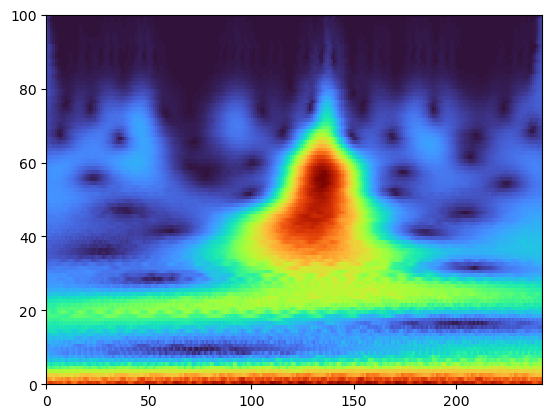

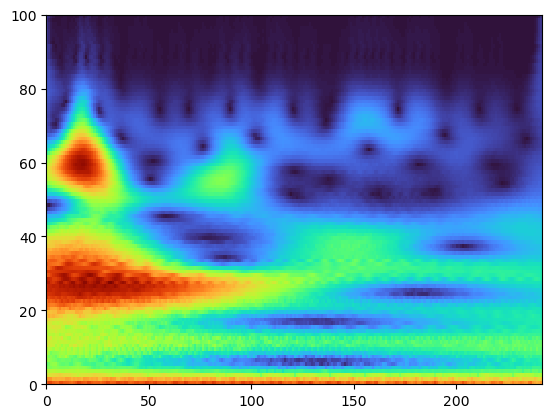

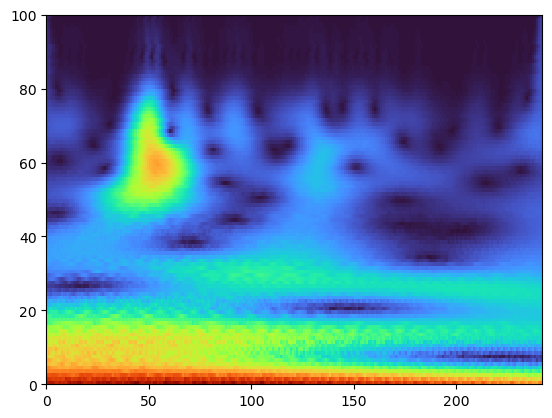

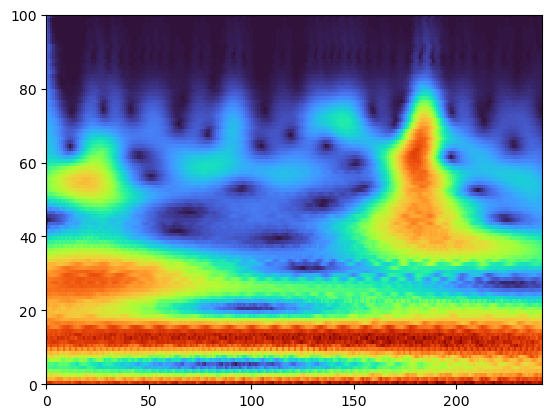

IndexError: list index out of range

In [239]:
for i in range(14):
    epo_i_tc = i_label_tc[i]
    result = process_channel(
                    signal=epo_i_tc,
                    cwt_wavelet=cwt_wavelet, 
                    scales=scales, 
                    sampling_period=sampling_period,
                    dwt_wavelet_name=dwt_wavelet_name, 
                    level=level
                    )
    result_swapped = np.transpose(result, (0,2,1))
    plt.pcolormesh(result_swapped.squeeze(), cmap='turbo')
    plt.show()

In [64]:
with open("/Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/all_covert_reading.pkl", 'rb') as f: 
    data_covert_reading = pickle.load(f)

In [240]:
i_16_epochs = data_covert_reading.data['BCOM_01_2']['i_16']
stcs_i_r = mne.minimum_norm.apply_inverse_epochs(epochs=i_16_epochs, inverse_operator=inverse_operator, lambda2=lambda2, method='dSPM')
i_label_tc_r = mne.extract_label_time_course(stcs_i_r, label, source, mode='mean_flip', return_generator=False)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 247 (0 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 247 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Processing epoch : 1 / 11
combining the current components...
Processing epoch : 2 / 11
combining the current components...
Processing epoch : 3 / 11
combining the current components...
Processing epoch : 4 / 11
combining the current components...
Processing epoch : 5 / 11
combining the current components...
Processing epoch : 6 / 11
combining the current components...
Processing epoch : 7 / 11
combining the current components...
Processing epoch : 8 / 11
combining the current components...
Processing epoch : 9 / 11
combining the current

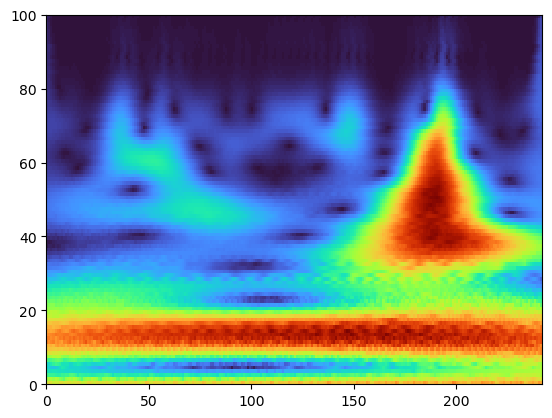

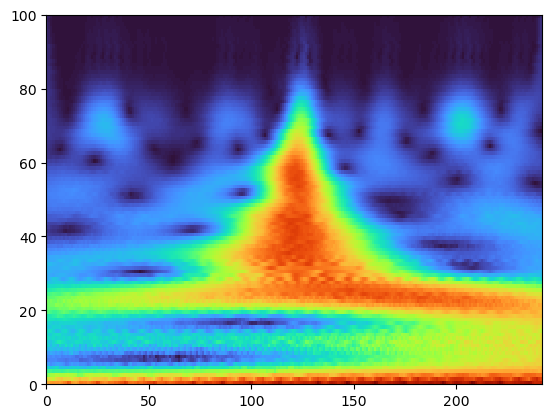

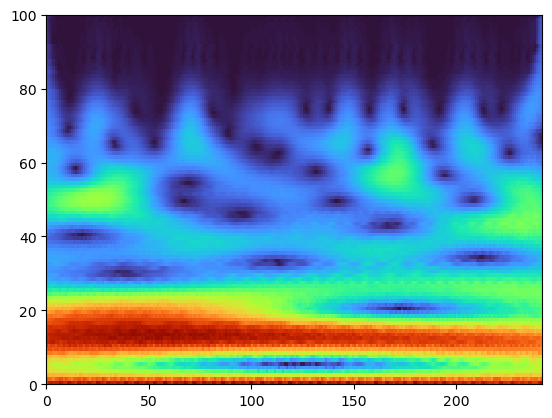

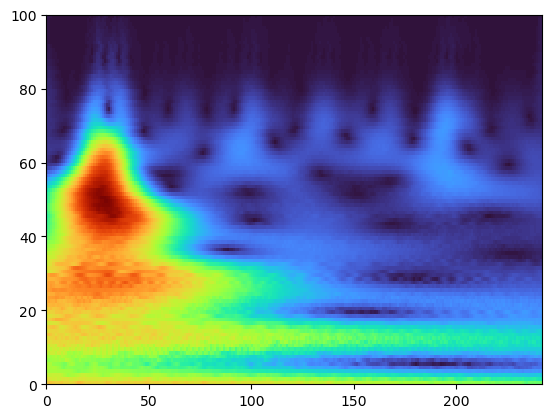

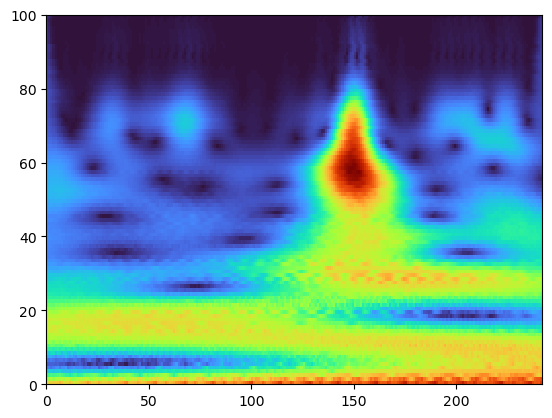

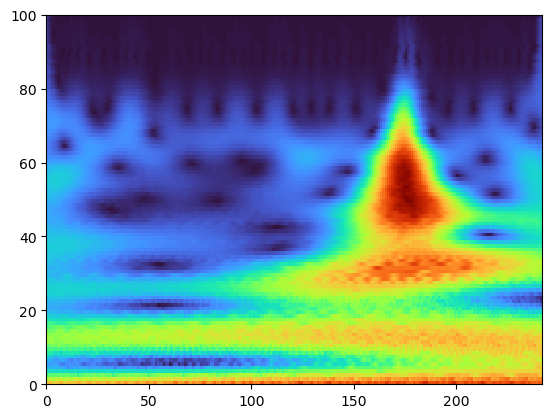

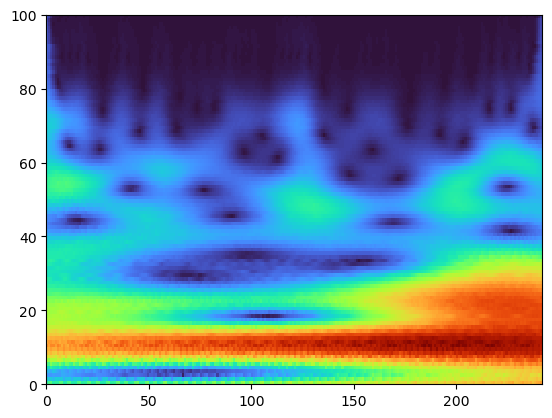

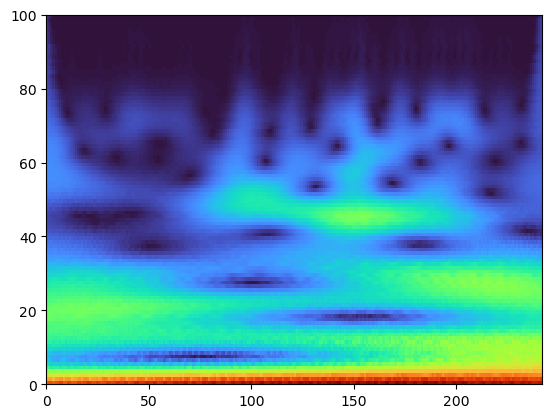

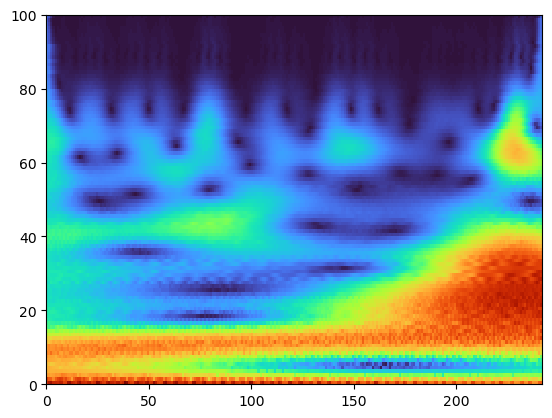

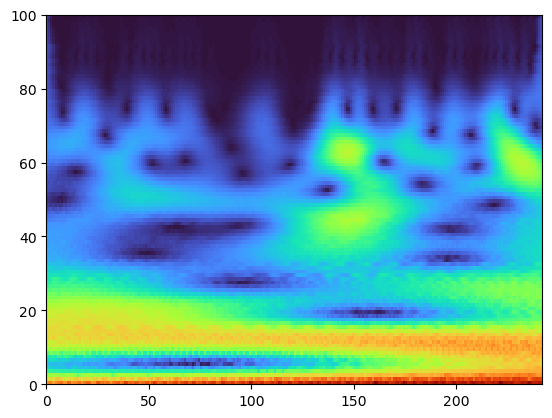

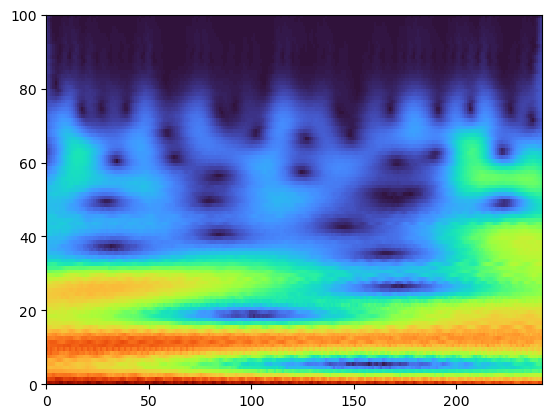

IndexError: list index out of range

In [241]:
for i in range(14):
    epo_i_tc = i_label_tc_r[i]
    result = process_channel(
                    signal=epo_i_tc,
                    cwt_wavelet=cwt_wavelet, 
                    scales=scales, 
                    sampling_period=sampling_period,
                    dwt_wavelet_name=dwt_wavelet_name, 
                    level=level
                    )
    result_swapped = np.transpose(result, (0,2,1))
    plt.pcolormesh(result_swapped.squeeze(), cmap='turbo')
    plt.show()

In [91]:
epoch_path = "/Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/OVERT/BCOM_01_2_a_12-epo.fif"  # Replace with the actual path to your file
epochs = mne.read_epochs(epoch_path, preload=True)

Reading /Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/OVERT/BCOM_01_2_a_12-epo.fif ...
    Found the data of interest:
        t =    -300.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


In [242]:
overt = epochs
overt_stc = mne.minimum_norm.apply_inverse_epochs(epochs=epochs, inverse_operator=inverse_operator, lambda2=lambda2, method='dSPM')
overt_label_tc = mne.extract_label_time_course(overt_stc, label, source, mode='mean_flip', return_generator=False)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 247 (0 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 247 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Processing epoch : 1 / 1
combining the current components...
[done]
Extracting time courses for 1 labels (mode: mean_flip)


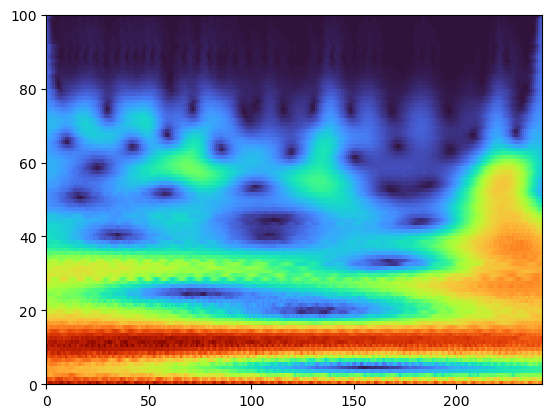

IndexError: list index out of range

In [243]:
for i in range(14):
    epo_i_tc = overt_label_tc[i]
    result = process_channel(
                    signal=epo_i_tc,
                    cwt_wavelet=cwt_wavelet, 
                    scales=scales, 
                    sampling_period=sampling_period,
                    dwt_wavelet_name=dwt_wavelet_name, 
                    level=level
                    )
    result_swapped = np.transpose(result, (0,2,1))
    plt.pcolormesh(result_swapped.squeeze(), cmap='turbo')
    plt.show()